# Testing 1GnB simulation

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Simulate Bernoulli trials: generate consumption requests vector

In [2]:
p_cons = 0.225
t_end = 10000

cons_requests = (np.random.rand(t_end) < p_cons)

print('%.3f'%p_cons)
p_cons_estimate = sum(cons_requests)/len(cons_requests)
print('%.3f (%.3f)'%(p_cons_estimate, np.sqrt(p_cons_estimate*(1-p_cons_estimate)/len(cons_requests)) ))

0.225
0.225 (0.004)


---
---
## Testing `single_run_1GnB()` - time evolution

In [3]:
n = 2

# GEN
p_gen = 1
F_new = 0.8
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 0.3
purif_policy = main.policy_DEJMPS
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.2

# Numerical
t_end = 50
randomseed = 2

In [6]:
imp.reload(main)

(Fcons_avg, Fcons_stderr, A_avg, A_stderr,
 buffered_fidelity_trace, cons_requests_trace, purif_events) = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)

print('Average consumed fidelity: %.3f (%.3f)'%(Fcons_avg, Fcons_stderr))
print('Average availability: %.3f (%.3f)'%(A_avg, A_stderr))

Average consumed fidelity: 0.697 (0.028)
Average availability: 0.889 (0.105)


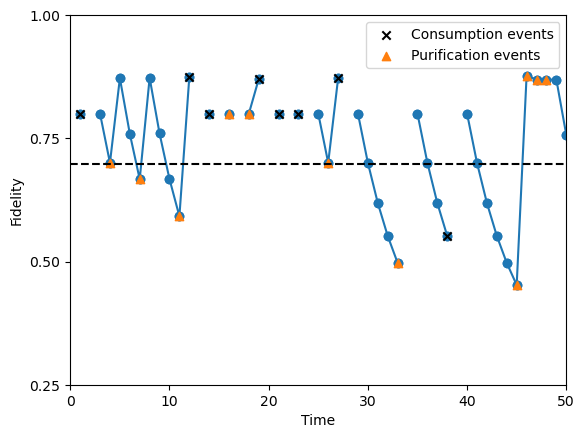

In [8]:
imp.reload(main)

main.plot_run_1GnB(Fcons_avg, buffered_fidelity_trace, cons_requests_trace, purif_events, n, p_gen, rho_new,
                    q_purif, purif_policy, pur_after_swap, Gamma, p_cons, t_end, randomseed)

---
### CONCLUSIONS:
 1. From visual inspection, seems to be working. Not tested quantitatively.
---

---
---
## Testing `single_run_1GnB()` - availability and consumed fidelity

In [11]:
n = 2

# GEN
p_gen = 1
F_new = 0.8
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 0.3
purif_protocol = main.DEJMPS
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.2

# Numerical
t_end_vec = [int(10**i) for i in np.linspace(1,5,50)]
randomseed = 2

In [12]:
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []

for t_end in tqdmn(t_end_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                                               purif_protocol, pur_after_swap, Gamma,
                                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

  0%|          | 0/50 [00:00<?, ?it/s]

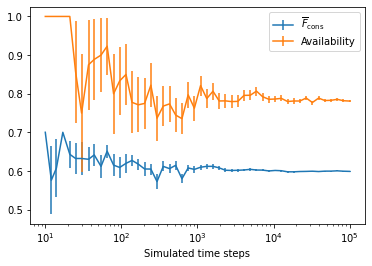

In [13]:
#------------------------------------
# Plot
#------------------------------------
fig, ax = plt.subplots()
plt.errorbar(t_end_vec, Fcons_avg_vec, yerr=Fcons_stderr_vec, label=r'$\overline{F}_\mathrm{cons}$')
plt.errorbar(t_end_vec, A_avg_vec, yerr=A_stderr_vec, label=r'Availability')

plt.xscale('log')

plt.xlabel('Simulated time steps')

plt.legend()

---
### CONCLUSIONS:
 1. Both avgerage consumed fidelity and availability converge relatively quickly in the cases we tested. We did not burn out the transient state.
---

---
---
## Testing `single_run_1GnB()` - performance for different $q$

In [17]:
n = 2

# GEN
p_gen = 1
F_new = 0.8
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0, 1, 10)
purif_protocol = main.DEJMPS
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.2

# Numerical
t_end = int(1e5)
randomseed = 2

In [18]:
imp.reload(main)

Fcons_avg_vec = []
Fcons_stderr_vec = []
A_avg_vec = []
A_stderr_vec = []

for q_purif in tqdmn(q_purif_vec, leave=False):
    Fcons_avg, Fcons_stderr, A_avg, A_stderr, _, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                                               purif_protocol, pur_after_swap, Gamma,
                                                                               p_cons, t_end, randomseed)
    Fcons_avg_vec += [Fcons_avg]
    Fcons_stderr_vec += [Fcons_stderr]
    A_avg_vec += [A_avg]
    A_stderr_vec += [A_stderr]

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0, 0.5, '$\\overline{F}_\\mathrm{cons}$')

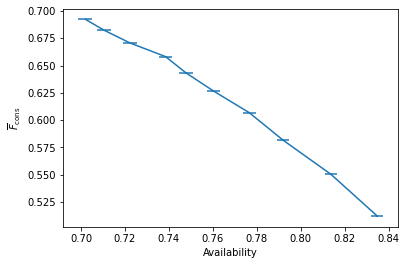

In [19]:
#------------------------------------
# Plot
#------------------------------------
fig, ax = plt.subplots()
plt.errorbar(A_avg_vec, Fcons_avg_vec, yerr=Fcons_stderr_vec, xerr=A_stderr_vec)


plt.xlabel('Availability')
plt.ylabel(r'$\overline{F}_\mathrm{cons}$')